In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Gọi các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Import các metrics cần thiết
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #f1, recall, pre
from sklearn.metrics import confusion_matrix

# Gọi các model cần thiết cho bài toán classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression

# Sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

In [4]:
data = pd.read_csv('data/creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Số transaction có gian lận tín dụng: 492 và không có gian lận tín dụng: 284315
Tỉ lệ giữa không gian lận và gian lận: 577.8760162601626


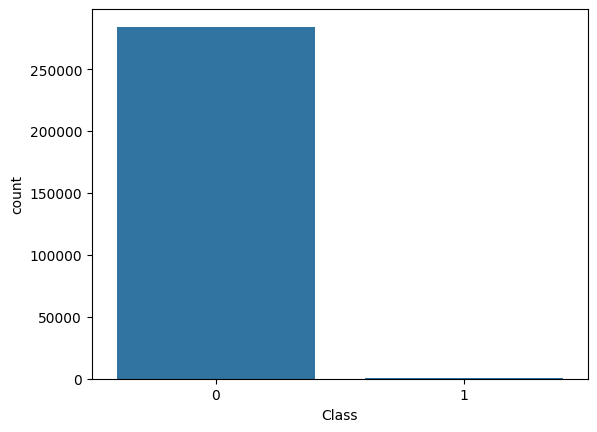

In [6]:
# Vẽ biểu diễn số dữ liệu cho mỗi class
sns.countplot(x= "Class", data= data)
fraud = len(data[data.Class == 1])
no_fraud = len(data[data.Class == 0])

print("Số transaction có gian lận tín dụng: {} và không có gian lận tín dụng: {}".format(fraud, no_fraud))
print("Tỉ lệ giữa không gian lận và gian lận: {}".format(no_fraud/fraud))

# Khi dữ liệu lệch


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Class"], axis = 1), data["Class"], test_size = 0.3, random_state = 0)

# Logistic Regression


Accuracy score: 99.9133925541004 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.71      0.74       147

    accuracy                           1.00     85443
   macro avg       0.88      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443



c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


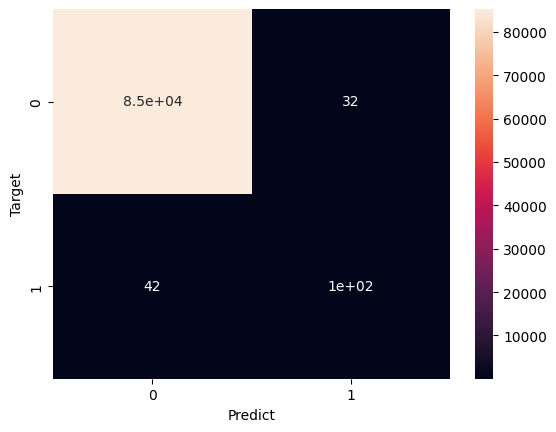

In [8]:
logis_model = LogisticRegression(max_iter=100)
logis_model.fit(X_train, y_train)

y_pred = logis_model.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

Accuracy score: 99.94967405170698 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



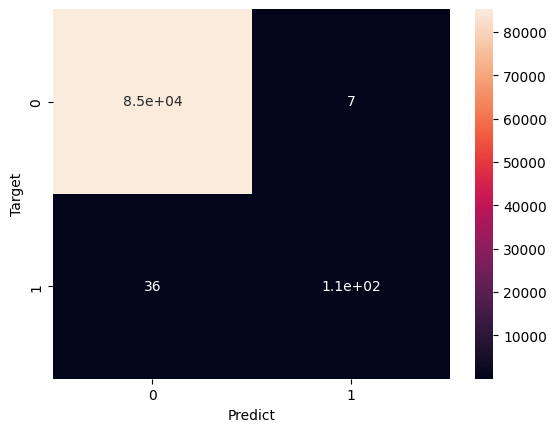

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

### Sử dụng SMOTE (Oversampling)

In [10]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

Số transaction có gian lận tín dụng: 199019 và không có gian lận tín dụng: 199019
Tỉ lệ giữa không gian lận và gian lận: 1.0


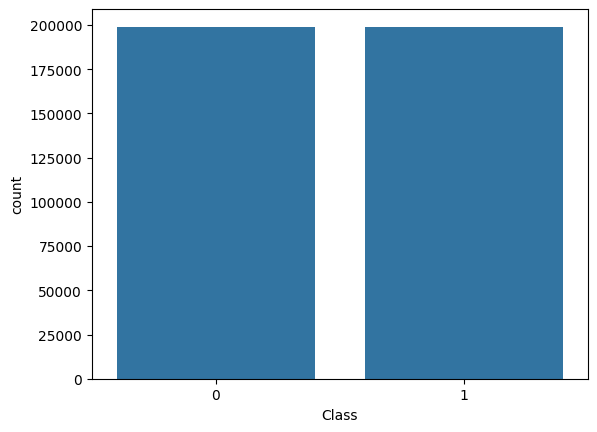

In [15]:
train_data = X_sm.copy()
train_data["Class"] = y_sm

# Vẽ biểu diễn số dữ liệu cho mỗi class trong train_data
sns.countplot(x= "Class", data= train_data)
fraud = len(train_data[train_data.Class == 1])
no_fraud = len(train_data[train_data.Class == 0])

print("Số transaction có gian lận tín dụng: {} và không có gian lận tín dụng: {}".format(fraud, no_fraud))
print("Tỉ lệ giữa không gian lận và gian lận: {}".format(no_fraud/fraud))

Accuracy score: 98.19645845768524 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.87      0.14       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


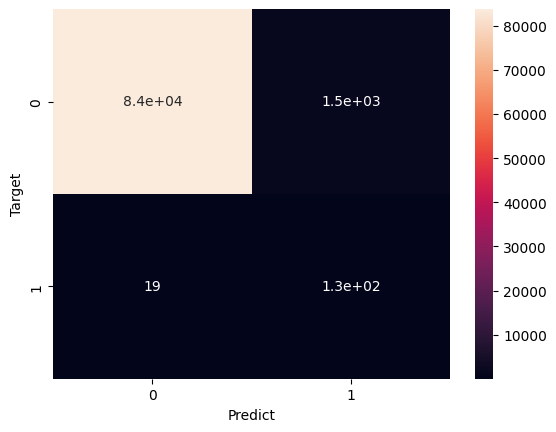

In [17]:
logis_model_sm = LogisticRegression(max_iter=100)
logis_model_sm.fit(X_sm, y_sm)

y_pred = logis_model_sm.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

Accuracy score: 99.9531851643786 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.82      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



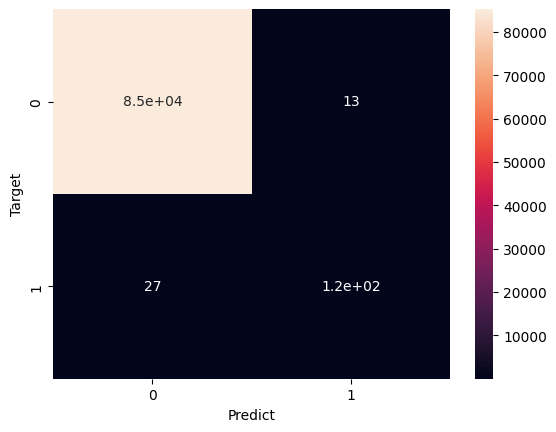

In [18]:
rf_sm = RandomForestClassifier(n_estimators=100, random_state=0)
rf_sm.fit(X_sm, y_sm)

y_pred = rf_sm.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

# Undersampling

In [21]:
clus_centroid = ClusterCentroids(sampling_strategy={0: 345})
X_under, y_under = clus_centroid.fit_resample(X_train, y_train)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,142659.902107,0.280009,-0.013207,-0.802141,-0.272048,0.203575,-0.146944,0.014084,-0.053622,-0.145012,...,0.034839,0.198685,0.053131,-0.023511,-0.109009,-0.015902,0.019978,0.003793,71.636927,0
1,64244.953103,-0.147918,0.139098,0.667930,0.136087,-0.231167,0.008173,-0.088042,0.059328,-0.238102,...,-0.036101,-0.133821,-0.023492,-0.021963,0.122122,0.029123,0.008834,0.014135,74.513021,0
2,30522.051471,-0.294244,0.143328,0.534228,0.152150,-0.211388,0.024970,-0.133304,0.166579,-0.189650,...,0.003899,-0.118719,-0.017849,-0.024971,0.168366,-0.016167,-0.004503,-0.002284,69.535717,0
3,119079.208499,0.512666,-0.211179,-0.632550,-0.179593,0.249012,-0.134444,0.048739,-0.138531,-0.072786,...,0.110513,0.175097,0.075854,-0.039994,-0.140165,-0.009874,0.011340,-0.000374,81.800212,0
4,158525.002564,0.413767,0.029361,-0.673026,-0.249985,0.272118,-0.149192,0.115137,-0.070953,-0.044566,...,0.017094,0.083407,0.072422,-0.024793,-0.122860,0.017728,0.031733,-0.005174,69.480949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,8878.000000,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.000000,1
686,87202.000000,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,...,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,451.270000,1
687,55279.000000,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,...,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1.000000,1
688,41233.000000,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.000000,1


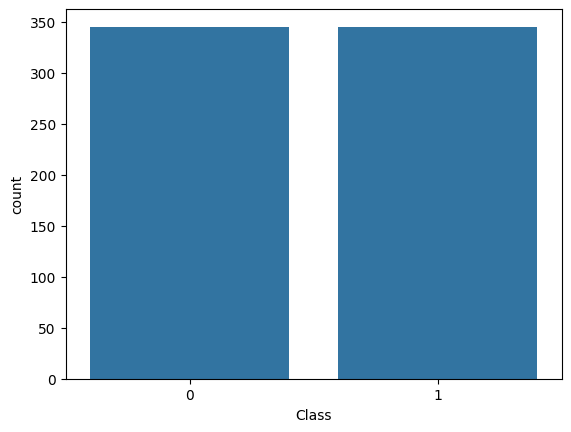

In [48]:

df = pd.DataFrame(pd.concat([X_under, y_under],axis=1), columns=data.columns)

sns.countplot(x= "Class", data= df)
df


Accuracy score: 87.85272052713505 %
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     85296
           1       0.01      0.94      0.03       147

    accuracy                           0.88     85443
   macro avg       0.51      0.91      0.48     85443
weighted avg       1.00      0.88      0.93     85443



c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


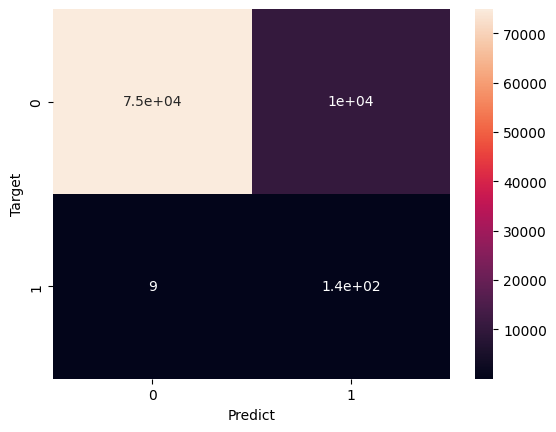

In [49]:
logis_model_un = LogisticRegression(max_iter=100)
logis_model_un.fit(X_under, y_under)

y_pred = logis_model_un.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

Accuracy score: 7.970225764544785 %
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     85296
           1       0.00      0.99      0.00       147

    accuracy                           0.08     85443
   macro avg       0.50      0.54      0.07     85443
weighted avg       1.00      0.08      0.14     85443



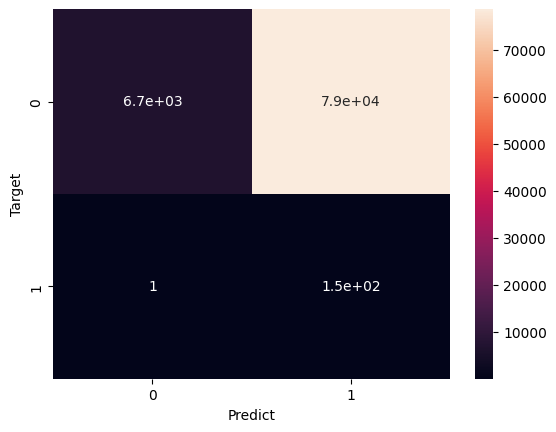

In [50]:
rf_un = RandomForestClassifier(n_estimators=100, random_state=0)
rf_un.fit(X_under, y_under)

y_pred = rf_un.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

Accuracy score: 87.85272052713505 %
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     85296
           1       0.01      0.94      0.03       147

    accuracy                           0.88     85443
   macro avg       0.51      0.91      0.48     85443
weighted avg       1.00      0.88      0.93     85443



c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


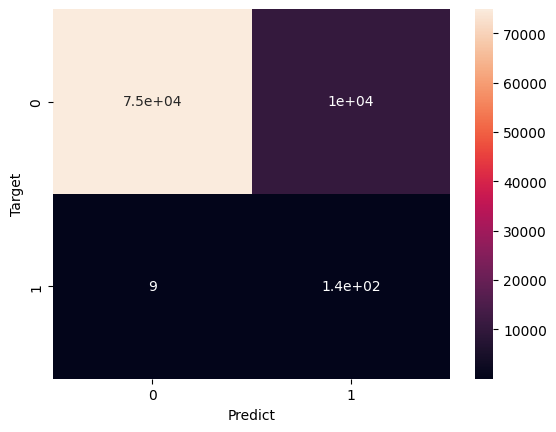